In [567]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import seaborn as sns
import numpy as np

In [617]:
df = pd.read_csv("netflix_titles.csv")


#### All the DataTypes in the datasets

In [618]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

#### Checking for empty spaces

In [619]:
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

## Filling Nulls

In [620]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] =df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna('Unknown')

# df.dropna()

In [621]:
df.count()

show_id         8807
type            8807
title           8807
director        8807
cast            8807
country         8807
date_added      8807
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

#### How many shows and movies there are in the dataset

In [622]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

#### Now in a graph

Text(0.5, 1.0, 'Total Show count according to type')

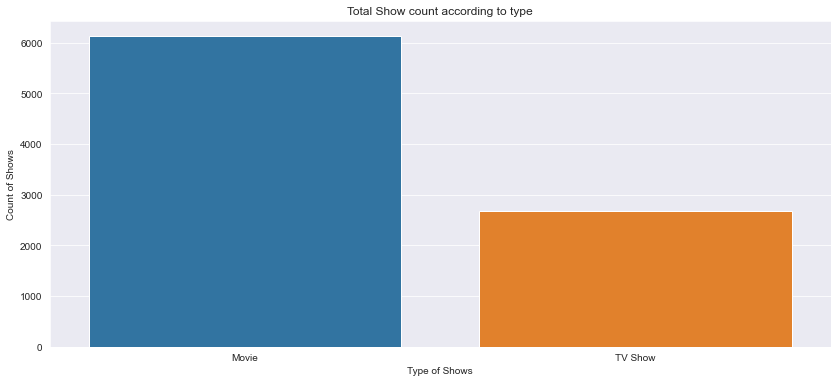

In [623]:
plt.figure(figsize=(14,6))
sns.countplot(x='type', data=df)
plt.xlabel('Type of Shows')
plt.ylabel('Count of Shows')
plt.title('Total Show count according to type')

#### Shows How Many Movies/Shows The Top Ten Countries Have Produced on Netflix from 1970 to 2020.

In [624]:
df['country'].value_counts().sort_values(ascending= False).head(11)


United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

#### Filter to show the top 10 countries with highest number of released content from 1970-2020

In [625]:
top_10 = df.groupby('country').count().reset_index().sort_values(ascending=False,by='show_id')[0:11]['country']
top_10_df = df[df['country'].isin(top_10)]

#### Now in a graph

(1970.0, 2020.0)

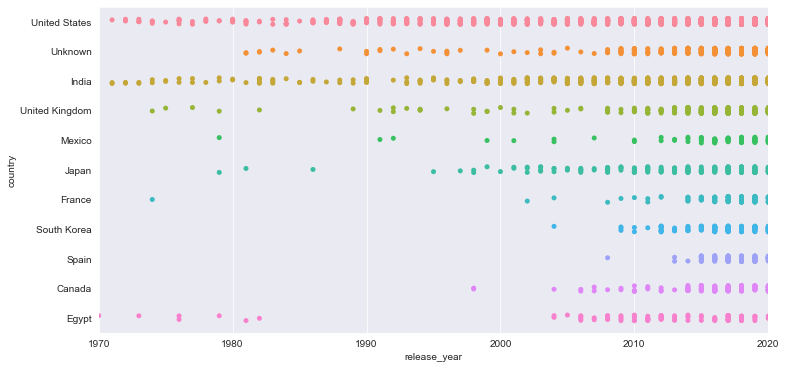

In [626]:
plt.figure(figsize=(12,6))
sns.stripplot(y='country', x='release_year', data=top_10_df)
plt.xlim(1970,2020)

#### Filter For all the US Movies

In [627]:
USM = df[ (df.type=='Movie') & (df.country=='United States')]
USM.groupby('country')['type'].value_counts()

country        type 
United States  Movie    2058
Name: type, dtype: int64

#### Filter For all the US TV Shows

In [628]:
USTV = df[ (df.type=='TV Show') & (df.country=='United States')]
USTV.groupby('country')['type'].value_counts()

country        type   
United States  TV Show    760
Name: type, dtype: int64

#### Bellow is a chart that shows how many movies, in the current most popular genres, there are in the dataset.

In [629]:
Action = df.listed_in.str.contains(r'Action')
Total_Action = df[Action].listed_in.value_counts().sum()

Adventure = df.listed_in.str.contains(r'Adventure')
Total_Adventure = df[Adventure].listed_in.value_counts().sum()

Comedies = df.listed_in.str.contains(r'Comedies')
Total_Comedies = df[Comedies].listed_in.value_counts().sum()

Sci_Fi = df.listed_in.str.contains(r'Sci-Fi')
Total_Sci_Fi = df[Sci_Fi].listed_in.value_counts().sum()

Horror = df.listed_in.str.contains(r'Horror')
Total_Horror = df[Horror].listed_in.value_counts().sum()

In [630]:
results_df = pd.DataFrame( {
        "Type": ["Action", "Adventure", "Comedies","Sci-Fi","Horror"],
        "Count": [Total_Action, Total_Adventure, Total_Comedies, Total_Sci_Fi, Total_Horror] }
        )
results_df

,Type,Count
0,Action,1027
1,Adventure,1027
2,Comedies,2255
3,Sci-Fi,327
4,Horror,432


#### Bellow is a chart that shows how many movies, in the current most popular genres, there are in the dataset released by the US.

In [631]:
US_Action = df[ (df.listed_in.str.contains(r'Action')) & (df.country=='United States')]
USA = US_Action.value_counts().sum()

US_Adventure = df[ (df.listed_in.str.contains(r'Adventure')) & (df.country=='United States')]
USAD = US_Adventure.value_counts().sum()

US_Comedies = df[ (df.listed_in.str.contains(r'Comedies')) & (df.country=='United States')]
USC = US_Comedies.value_counts().sum()

US_Sci_Fi = df[ (df.listed_in.str.contains(r'Sci-Fi')) & (df.country=='United States')]
USS = US_Sci_Fi.value_counts().sum()

US_Horror = df[ (df.listed_in.str.contains(r'Horror')) & (df.country=='United States')]
USH = US_Horror.value_counts().sum()


In [632]:
US_results = pd.DataFrame( {
        "Type": ["Action", "Adventure", "Comedies","Sci-Fi","Horror"],
        "Count": [USA, USAD, USC, USS, USH] }
        )
US_results

,Type,Count
0,Action,319
1,Adventure,319
2,Comedies,758
3,Sci-Fi,154
4,Horror,172


#### 

In [633]:
df['duration'].value_counts().sort_values(ascending= False).head(20)

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
97 min        146
93 min        146
91 min        144
95 min        137
96 min        130
92 min        129
102 min       122
98 min        120
99 min        118
101 min       116
88 min        116
103 min       114
106 min       111
100 min       108
89 min        106
Name: duration, dtype: int64

In [634]:
df[df.country == 'United States'].groupby('duration')['duration'].count().sort_values(ascending= False).head(20)

duration
1 Season     402
2 Seasons    128
3 Seasons     79
90 min        71
97 min        66
91 min        57
94 min        56
93 min        54
92 min        53
4 Seasons     53
88 min        52
98 min        51
86 min        49
96 min        47
89 min        47
95 min        45
104 min       41
101 min       39
87 min        38
83 min        38
Name: duration, dtype: int64